In [1]:
import numpy as np
import pandas as pd  # 데이터 읽기
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 읽어오기

In [3]:
data = pd.read_csv('gpascore.csv')
data.head()


,admit,gre,gpa,rank
0,0,380.0,3.21,3
1,1,660.0,3.67,3
2,1,800.0,4.00,1
3,1,640.0,3.19,4
4,0,520.0,2.33,4


In [4]:
data.shape

(426, 4)

# 데이터 전처리

In [5]:
data = data.dropna() # null 데이터 제거

In [6]:
data.shape

(425, 4)

In [7]:
data['gre'].max()  # max 토익점수

800.0

In [8]:
#X = data.drop(['admit'],axis = 1)  # 피쳐 설정
#X = np.asarray(X)


In [9]:
# 왜 그냥 y = data['adimit'] 하면 안되나?
Y = data['admit'].values  # 레이블
Y_max = np.max(Y)
Y_max

1

In [10]:
# 또 다른 방식으로 x 데이터 만드는방법
X = []
for i, rows in data.iterrows():
    #print(rows['gre'], rows['gpa'],rows['rank'])
    X.append([rows['gre'], rows['gpa'],rows['rank']])
    
X


[[380.0, 3.21, 3.0],
 [660.0, 3.67, 3.0],
 [800.0, 4.0, 1.0],
 [640.0, 3.19, 4.0],
 [520.0, 2.33, 4.0],
 [760.0, 3.0, 2.0],
 [560.0, 2.98, 1.0],
 [400.0, 3.08, 2.0],
 [540.0, 3.39, 3.0],
 [700.0, 3.92, 2.0],
 [750.0, 3.6, 4.0],
 [440.0, 3.22, 1.0],
 [760.0, 4.0, 1.0],
 [600.0, 3.08, 2.0],
 [700.0, 4.0, 1.0],
 [480.0, 3.44, 3.0],
 [490.0, 3.87, 4.0],
 [360.0, 2.56, 3.0],
 [800.0, 3.75, 2.0],
 [500.0, 3.17, 3.0],
 [660.0, 3.63, 2.0],
 [600.0, 2.82, 4.0],
 [680.0, 3.19, 4.0],
 [760.0, 3.35, 2.0],
 [800.0, 3.66, 1.0],
 [620.0, 3.61, 1.0],
 [520.0, 3.74, 4.0],
 [780.0, 3.22, 2.0],
 [520.0, 3.29, 1.0],
 [540.0, 3.78, 4.0],
 [760.0, 3.35, 3.0],
 [600.0, 3.4, 3.0],
 [800.0, 4.0, 3.0],
 [360.0, 3.14, 1.0],
 [400.0, 3.05, 2.0],
 [580.0, 3.25, 1.0],
 [520.0, 2.9, 3.0],
 [500.0, 3.13, 2.0],
 [520.0, 2.68, 3.0],
 [560.0, 2.42, 2.0],
 [580.0, 3.32, 2.0],
 [600.0, 3.15, 2.0],
 [500.0, 3.31, 3.0],
 [700.0, 2.94, 2.0],
 [460.0, 3.45, 3.0],
 [580.0, 3.46, 2.0],
 [500.0, 2.97, 4.0],
 [440.0, 2.48, 4.0],


In [11]:
X_max = np.max(X,axis = 0)
print(X_max)

[800.   4.   4.]


In [12]:
X_max = np.max(X,axis = 0)
X = X/X_max
X

array([[0.475 , 0.8025, 0.75  ],
       [0.825 , 0.9175, 0.75  ],
       [1.    , 1.    , 0.25  ],
       ...,
       [0.5625, 0.8125, 1.    ],
       [0.95  , 0.94  , 0.5   ],
       [0.8875, 0.955 , 0.75  ]])

In [13]:
# 훈련/검증용 데이터 분할
X_train, X_test,y_train,y_test = \
    train_test_split(X,Y,
                    test_size = 0.3,
                    random_state = 1,
                    stratify = Y) # 각각의 비율을 유지.

In [14]:
EPOCHS =  100

In [15]:
model =tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(1,activation = 'sigmoid') # yer/no
    
])

In [16]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(np.array(X_train),np.array(y_train),epochs = EPOCHS,
                   validation_data = (np.array(X_test),np.array(y_test)),
                   callbacks=[early_stop])

2021-12-28 09:36:47.834661: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-28 09:36:47.836506: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 297 samples, validate on 128 samples
Epoch 1/100
297/297 [==============================] - 1s 3ms/sample - loss: 0.6884 - accuracy: 0.5152 - val_loss: 0.6832 - val_accuracy: 0.5234
Epoch 2/100
297/297 [==============================] - 0s 231us/sample - loss: 0.6829 - accuracy: 0.5286 - val_loss: 0.6803 - val_accuracy: 0.5234
Epoch 3/100
297/297 [==============================] - 0s 228us/sample - loss: 0.6802 - accuracy: 0.5387 - val_loss: 0.6791 - val_accuracy: 0.5703
Epoch 4/100
297/297 [==============================] - 0s 232us/sample - loss: 0.6811 - accuracy: 0.5993 - val_loss: 0.6782 - val_accuracy: 0.5859
Epoch 5/100
297/297 [==============================] - 0s 220us/sample - loss: 0.6767 - accuracy: 0.6061 - val_loss: 0.6770 - val_accuracy: 0.5859
Epoch 6/100
297/297 [==============================] - 0s 228us/sample - loss: 0.6759 - accuracy: 0.5993 - val_loss: 0.6760 - val_accuracy: 0.5859
Epoch 7/100
297/297 [==============================] - 0s 225us/sample - l

297/297 [==============================] - 0s 219us/sample - loss: 0.6532 - accuracy: 0.6094 - val_loss: 0.6649 - val_accuracy: 0.5625
Epoch 57/100
297/297 [==============================] - 0s 211us/sample - loss: 0.6549 - accuracy: 0.5960 - val_loss: 0.6647 - val_accuracy: 0.5625
Epoch 58/100
297/297 [==============================] - 0s 209us/sample - loss: 0.6553 - accuracy: 0.5960 - val_loss: 0.6650 - val_accuracy: 0.5625
Epoch 59/100
297/297 [==============================] - 0s 208us/sample - loss: 0.6502 - accuracy: 0.6027 - val_loss: 0.6642 - val_accuracy: 0.5625
Epoch 60/100
297/297 [==============================] - 0s 208us/sample - loss: 0.6580 - accuracy: 0.6094 - val_loss: 0.6642 - val_accuracy: 0.5625
Epoch 61/100
297/297 [==============================] - 0s 203us/sample - loss: 0.6540 - accuracy: 0.6027 - val_loss: 0.6642 - val_accuracy: 0.5625
Epoch 62/100
297/297 [==============================] - 0s 206us/sample - loss: 0.6535 - accuracy: 0.6027 - val_loss: 0.6638 

In [18]:
from tensorflow.keras.utils import plot_model

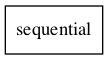

In [19]:
plot_model(model, 'input_and_output_model.png', show_shapes = True)

In [20]:
pred_y = model.predict(X_train)
pred_y

array([[0.3849195 ],
       [0.45677784],
       [0.3176952 ],
       [0.21238884],
       [0.3828844 ],
       [0.43785048],
       [0.47924632],
       [0.41883802],
       [0.44708288],
       [0.7597458 ],
       [0.7597458 ],
       [0.49193028],
       [0.7221147 ],
       [0.49616206],
       [0.7597458 ],
       [0.7597458 ],
       [0.6322338 ],
       [0.7597458 ],
       [0.4566171 ],
       [0.7597458 ],
       [0.6317952 ],
       [0.4602362 ],
       [0.7597458 ],
       [0.70255125],
       [0.46922565],
       [0.40208468],
       [0.41625732],
       [0.514714  ],
       [0.40651086],
       [0.4378648 ],
       [0.48150635],
       [0.38572863],
       [0.5135677 ],
       [0.433303  ],
       [0.23597133],
       [0.7489395 ],
       [0.29142705],
       [0.41842937],
       [0.7597458 ],
       [0.50486964],
       [0.45785958],
       [0.34949574],
       [0.5788854 ],
       [0.46520695],
       [0.54649824],
       [0.4433297 ],
       [0.50205463],
       [0.350

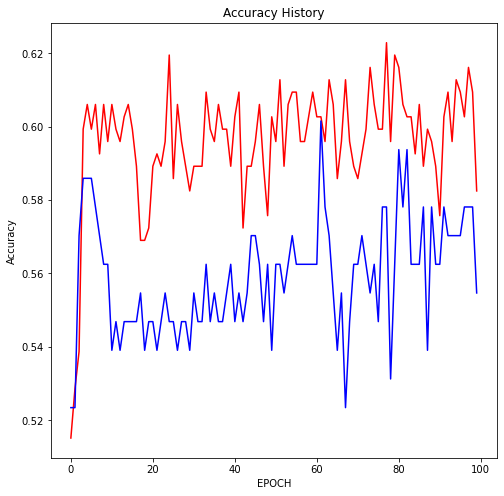

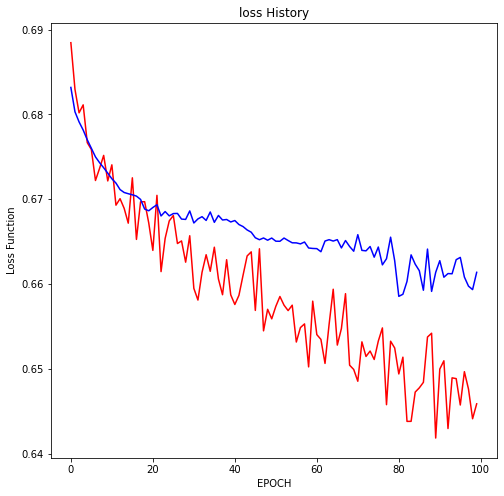

In [21]:
# 정확도
train_history = history.history["accuracy"]
test_history = history.history["val_accuracy"]
fig = plt.figure(figsize = (8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(test_history,"blue")
fig.savefig("train_history.png")

# 로스율
train_history = history.history["loss"]
test_history = history.history["val_loss"]
fig = plt.figure(figsize = (8, 8))
plt.title("loss History")
plt.xlabel("EPOCH")
plt.ylabel("Loss Function")
plt.plot(train_history, "red")
plt.plot(test_history, "blue")
fig.savefig("loss_history.png")

In [ ]:
minval = min(np.min(X), np.min(Y))
maxval = max(np.max(X), np.max(Y))
